In [2]:
import sys
import torch
import math
import numpy as np
import pandas as pd
import torch.nn as nn

sys.path.insert(0,'../')

from gtm import GTMEstimator

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine, load_boston, make_blobs, make_classification

from IPython.display import clear_output

## Iris

In [2]:
data = load_iris()

in_features = 2
hidden_features = 16
out_features = data.data.shape[1]

y = nn.Sequential(
    nn.Linear(in_features, hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features, out_features),
    )

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=20, verbose=False, y=y)
X = torch.FloatTensor(data.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

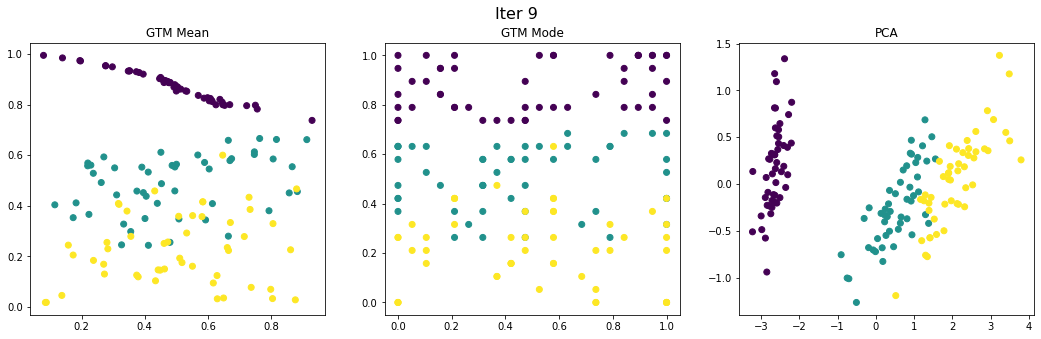

In [9]:
for i in range(10):
    est.train_epochs(X, 100)
    
    
    est.method = "mean"
    output_mean = (est.transform(X)).numpy()    
    
    est.method = "mode"
    output_mode = (est.transform(X)).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()

## Wine


Here the problem is that the initial guess of neural network is so far away from truth, that it gives 0 probabilities and -inf negative log likelihood

In [12]:
data = load_wine()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 10

y = nn.Sequential(
    nn.Linear(in_features, hidden_features,),
    nn.ELU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=20, verbose=False, y=y)
X = torch.FloatTensor(data.data)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

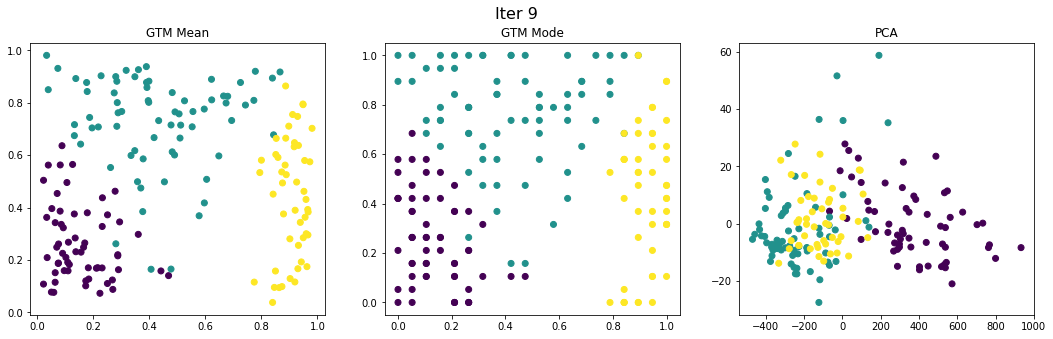

In [14]:
for i in range(10):
    est.train_epochs(X, 100)
    
    
    est.method = "mean"
    output_mean = (est.transform(X)).numpy()    
    
    est.method = "mode"
    output_mode = (est.transform(X)).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()

## Boston

Here the problem is that the initial guess of neural network is so far away from truth, that it gives 0 probabilities and -inf negative log likelihood

In [46]:
data = load_boston()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 16

y = nn.Sequential(
    nn.Linear(in_features, hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=20, verbose=False, y=y)
X = torch.FloatTensor(data.data)


est.init_y(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

AttributeError: 'GTMEstimator' object has no attribute 'init_y'

ValueError: 'c' argument has 506 elements, which is inconsistent with 'x' and 'y' with size 100.

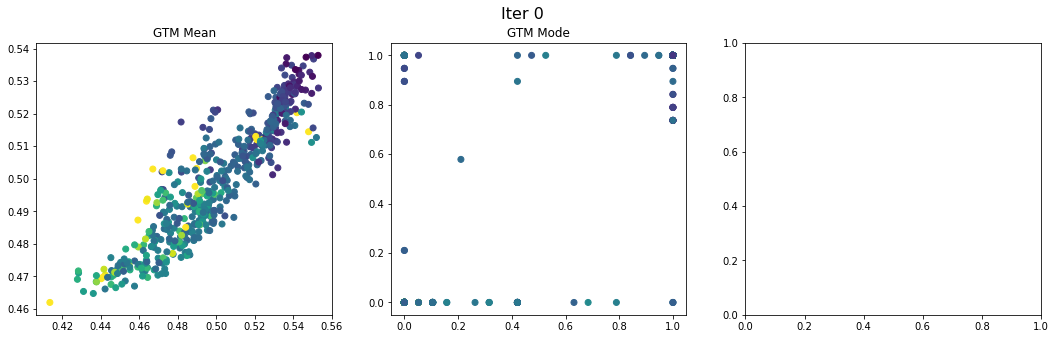

In [47]:
for i in range(10):
    est.train_epochs(X, 100)
    
    
    est.method = "mean"
    output_mean = (est.transform(X)).numpy()    
    
    est.method = "mode"
    output_mode = (est.transform(X)).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()

## Blobs

In [20]:
class load_blobs():
    def __init__(self, centers=2):
        self.data, self.target = make_blobs(centers=centers)

In [31]:
data = load_blobs()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 16

y = nn.Sequential(
    nn.Linear(in_features, hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features, out_features),
    )

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=20, verbose=False, y=y)
X = torch.FloatTensor(data.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

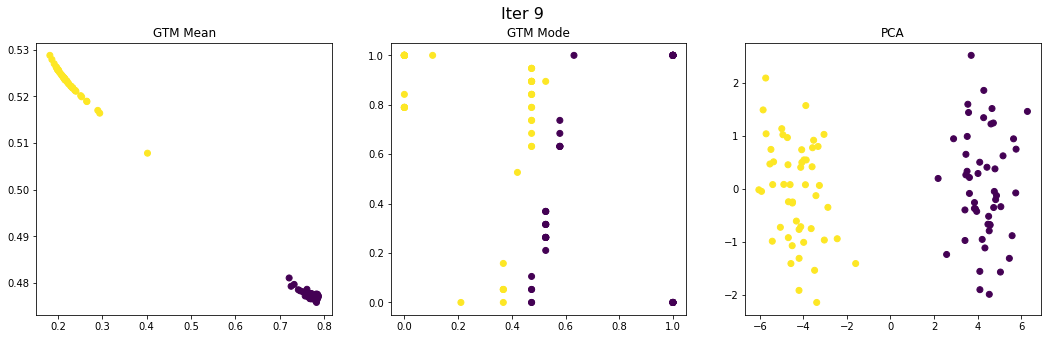

In [34]:
for i in range(10):
    est.train_epochs(X, 100)
    
    
    est.method = "mean"
    output_mean = (est.transform(X)).numpy()    
    
    est.method = "mode"
    output_mode = (est.transform(X)).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()

## Random classification

In [35]:
class load_classification():
    def __init__(self, n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2):
        self.data, self.target = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes)

In [43]:
data = load_classification()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 16

y = nn.Sequential(
    nn.Linear(in_features, hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=10, verbose=False, y=y)
X = torch.FloatTensor(data.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

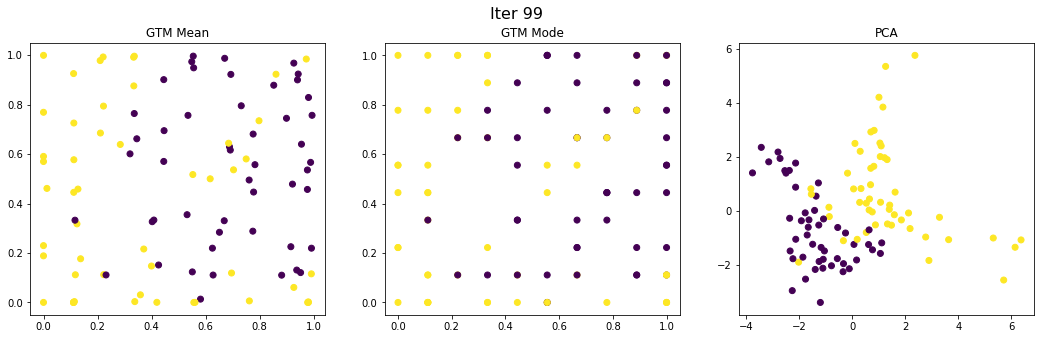

In [45]:
for i in range(100):
    est.train_epochs(X, 100)
    
    
    est.method = "mean"
    output_mean = (est.transform(X)).numpy()    
    
    est.method = "mode"
    output_mode = (est.transform(X)).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()